In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras .layers import Dense, Conv2D, MaxPooling2D, Flatten, Input 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [ ]:
# Load the dataset
mnist = mnist.load_data()
(X_train, y_train), (X_test, y_test) = mnist

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step


In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# Reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [5]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
# Normalize the training and testing data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
# Convert the target variable into binary categories using keras to_categorical function
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]

In [8]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

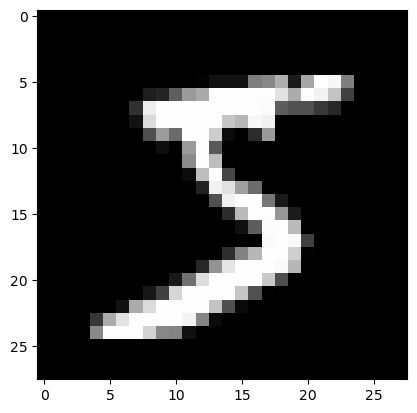

In [9]:
plt.imshow(X_train[0][:,:,0], cmap='gray')

In [11]:
def convolutional_model():
    model = Sequential()
    
    model.add(Input(shape=(28, 28, 1)))
    # First convolutional layer
    model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
    # Second convolutional layer
    model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
    # Flatten the output of the convolutional layers
    model.add(Flatten())
    # Fully connected layer
    model.add(Dense(128, activation='relu'))
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
# Build the model
model = convolutional_model()
# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(scores)
print(f"Accuracy: {scores[1]} \n Error: {100-scores[1]*100}")

Epoch 1/10
300/300 - 53s - 178ms/step - accuracy: 0.9572 - loss: 0.1358 - val_accuracy: 0.9854 - val_loss: 0.0450
Epoch 2/10
300/300 - 52s - 172ms/step - accuracy: 0.9883 - loss: 0.0391 - val_accuracy: 0.9887 - val_loss: 0.0328
Epoch 3/10
300/300 - 55s - 182ms/step - accuracy: 0.9928 - loss: 0.0236 - val_accuracy: 0.9893 - val_loss: 0.0334
Epoch 4/10
300/300 - 59s - 195ms/step - accuracy: 0.9943 - loss: 0.0175 - val_accuracy: 0.9876 - val_loss: 0.0383
Epoch 5/10
300/300 - 60s - 200ms/step - accuracy: 0.9959 - loss: 0.0123 - val_accuracy: 0.9898 - val_loss: 0.0332
Epoch 6/10
300/300 - 59s - 198ms/step - accuracy: 0.9975 - loss: 0.0081 - val_accuracy: 0.9881 - val_loss: 0.0392
Epoch 7/10
300/300 - 58s - 194ms/step - accuracy: 0.9977 - loss: 0.0067 - val_accuracy: 0.9893 - val_loss: 0.0426
Epoch 8/10
300/300 - 60s - 199ms/step - accuracy: 0.9969 - loss: 0.0088 - val_accuracy: 0.9893 - val_loss: 0.0450
Epoch 9/10
300/300 - 58s - 195ms/step - accuracy: 0.9981 - loss: 0.0058 - val_accuracy: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


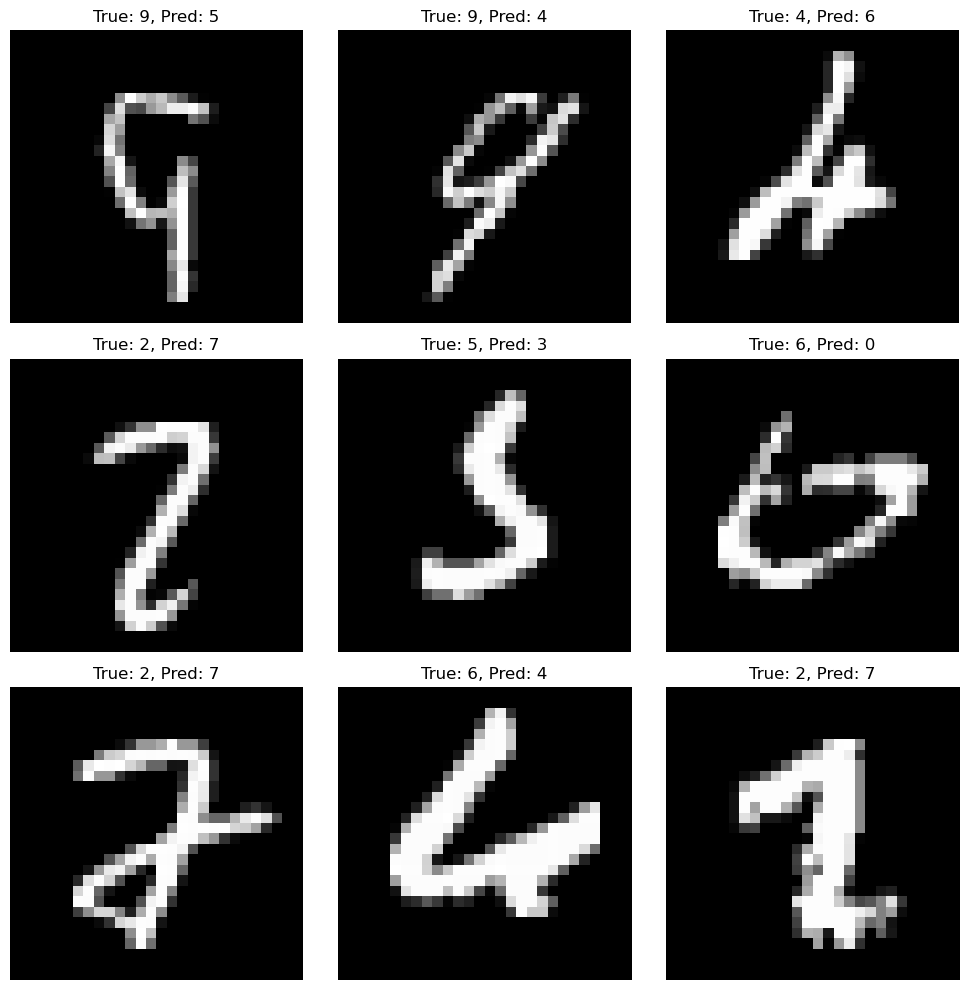

In [28]:
# Predict classes
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
misclassified_indices = np.where(predicted_classes != true_classes)[0]

# Plot first 9 misclassified images
plt.figure(figsize=(10, 10))
for i in range(9):
    idx = misclassified_indices[i]
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_classes[idx]}, Pred: {predicted_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Predicted class: 3, True class: 3


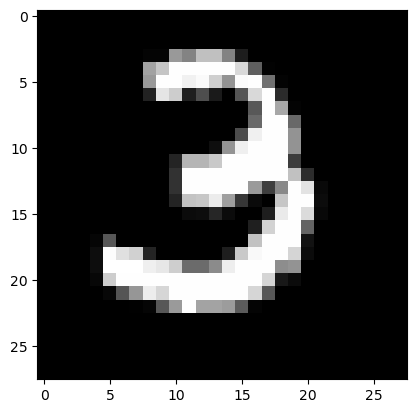

In [ ]:
plt.imshow(X_test[2431][:,:,0], cmap='gray')
print(f"Predicted class: {predicted_classes[2431]}, True class: {true_classes[2431]}")